<a href="https://colab.research.google.com/github/Dracarys38/Machyne-navchanya/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%9C%D0%9D%2C_%D0%9F%D0%BE%D1%81%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8F%D0%BA_%D0%86%D0%B3%D0%BE%D1%80_%D0%A1%D0%B5%D1%80%D0%B3%D1%96%D0%B9%D0%BE%D0%B2%D0%B8%D1%87_%D0%A4%D0%86%D0%A2_3_15%2C_10_%D0%B2%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Статус відповіді: 200
Знайдено таблиць: 8

Використовується таблиця 3, форма: (222, 4)

1. Перші 5 рядків:
  Country/Territory IMF (2025)[6] World Bank (2024)[7]  \
0             World     117165394            111326370   
1     United States      30615743             28750956   
2        China[n 1]      19398577             18743803   
3           Germany       5013574              4685593   
4             Japan       4279828              4027598   

  United Nations (2024)[8]  
0                100834796  
1                 29298000  
2                 18743802  
3                  4659929  
4                  4026211  

2. Розмір датасету: (222, 4)

3. Після вибору стовпців та перейменування:
         Country   MVF_2024 WorldBank_2023   OON_2022
0          World  117165394      111326370  100834796
1  United States   30615743       28750956   29298000
2     China[n 1]   19398577       18743803   18743802
3        Germany    5013574        4685593    4659929
4          Japan    42798

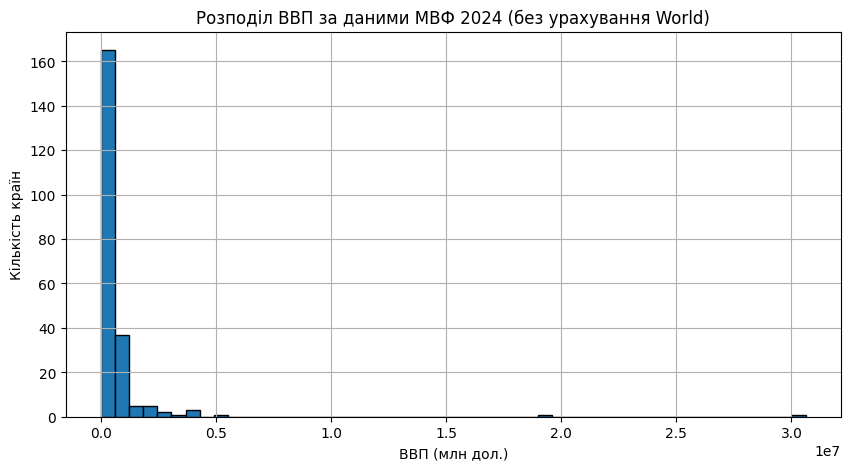

14. Розподіл сильно скошений вправо, більшість країн мають малий ВВП, одиниці – величезний (США, Китай)

15. Частки топ-5 країн (у % від світового ВВП):
         Country  share_MVF   share_WB  share_OON
1  United States  26.130363  25.825827  29.055446
2     China[n 1]  16.556576  16.836804  18.588625
3        Germany   4.279057   4.208880   4.621350
4          Japan   3.652809   3.617829   3.992879
5          India   3.520846   3.512099   3.919524
Частки країн з часом змінюються: Китай зростає, Японія спадає


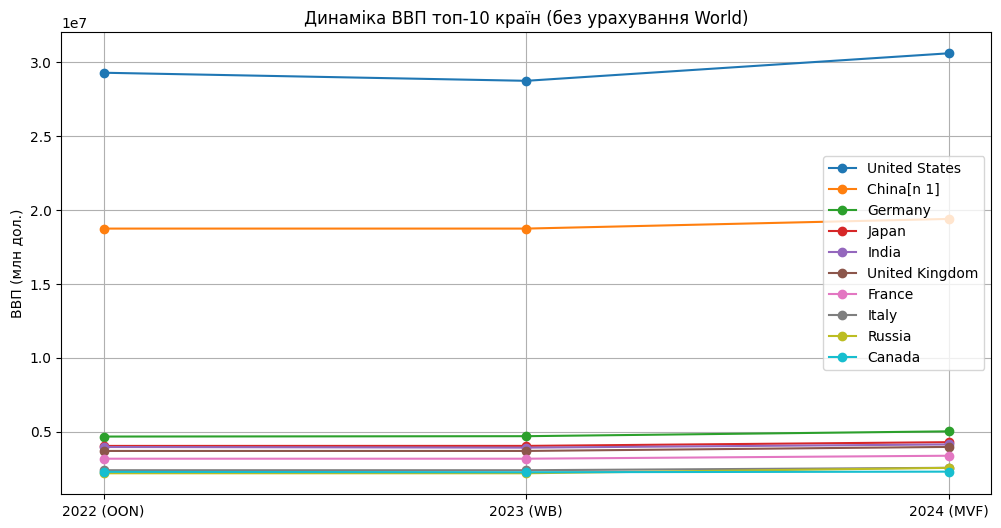

16. Більшість країн зростають, але Японія – спадає


In [4]:
# Постельняк Ігор Сергійович ФІТ 3-15
# Варіант 10
# Завдання 1.
# Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії за посиланням https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

# 1. Завантаження даних
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'}
response = requests.get(url, headers=headers)
print("Статус відповіді:", response.status_code)

tables = pd.read_html(StringIO(response.text), flavor='lxml')
print(f"Знайдено таблиць: {len(tables)}")

# Вибір потрібної таблиці (індекс 3)
df_gdp = tables[3].copy()
print(f"\nВикористовується таблиця 3, форма: {df_gdp.shape}")

# 2. Перші 5 рядків
print("\n1. Перші 5 рядків:")
print(df_gdp.head())

# 3. Розмір датасету
print(f"\n2. Розмір датасету: {df_gdp.shape}")

# 4. Вибір стовпців та перейменування
df_gdp = df_gdp.copy()
df_gdp.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']
print("\n3. Після вибору стовпців та перейменування:")
print(df_gdp.head())

# 5. Тип даних до обробки
print("\n4. Типи даних (до обробки):")
print(df_gdp.dtypes)

# 6. Заміна "—" на NaN та конвертація в числові
df_gdp.replace("—", np.nan, inplace=True)

def clean_number(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, str):
        x = x.replace(',', '').replace(' ', '').strip()
    return x

for col in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    df_gdp[col] = df_gdp[col].apply(clean_number)
    df_gdp[col] = pd.to_numeric(df_gdp[col], errors='coerce')

print("\n5. Кількість пропусків після заміни:")
print(df_gdp.isnull().sum())

# Заповнення пропусків середнім
for col in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    df_gdp[col] = df_gdp[col].fillna(df_gdp[col].mean())

print("\n6. Кількість пропусків після заповнення:")
print(df_gdp.isnull().sum())

print("\nТипи даних після обробки:")
print(df_gdp.dtypes)

# 7. Дублікати
duplicates = df_gdp.duplicated().sum()
print(f"\n7. Дублікатів: {duplicates}")
if duplicates > 0:
    df_gdp.drop_duplicates(inplace=True)

# 8. Описова статистика
print("\n8. Описова статистика:")
print(df_gdp[['MVF_2024', 'WorldBank_2023', 'OON_2022']].describe())

# 9. Відхилення між MVF_2024 та WorldBank_2023 (без урахування рядка World)
df_countries_only = df_gdp[df_gdp['Country'] != 'World'].copy()
df_countries_only['diff_MVF_WB'] = df_countries_only['MVF_2024'] - df_countries_only['WorldBank_2023']
top_diff = df_countries_only[['Country', 'diff_MVF_WB']].copy()
top_diff['abs_diff'] = top_diff['diff_MVF_WB'].abs()
top_diff = top_diff.sort_values('abs_diff', ascending=False).head(5)
print("\n9. Країни з найбільшою різницею (MVF_2024 - WorldBank_2023):")
print(top_diff[['Country', 'diff_MVF_WB']])

# 10. Кореляція
corr = df_gdp[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print("\n10. Кореляційна матриця:")
print(corr)
print("Найвища кореляція між WorldBank_2023 та OON_2022")

# 11. Середні значення
means = df_gdp[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print("\n11. Середні значення:")
print(means)

# 12. Стандартне відхилення для кожної країни (без World)
df_countries_only['std_across_years'] = df_countries_only[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)
max_std_country = df_countries_only.loc[df_countries_only['std_across_years'].idxmax(), 'Country']
print(f"\n12. Країна з найвищою варіативністю: {max_std_country}")

# 13. Екстремуми по роках (без World)
print("\n13. Екстремуми по роках:")
for col in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    max_c = df_countries_only.loc[df_countries_only[col].idxmax(), 'Country']
    min_c = df_countries_only.loc[df_countries_only[col].idxmin(), 'Country']
    print(f"{col}: найвищий – {max_c}, найнижчий – {min_c}")

# 14. Гістограма для MVF_2024 (без World, щоб краще бачити розподіл)
plt.figure(figsize=(10,5))
plt.hist(df_countries_only['MVF_2024'], bins=50, edgecolor='black')
plt.title('Розподіл ВВП за даними МВФ 2024 (без урахування World)')
plt.xlabel('ВВП (млн дол.)')
plt.ylabel('Кількість країн')
plt.grid(True)
plt.show()
print("14. Розподіл сильно скошений вправо, більшість країн мають малий ВВП, одиниці – величезний (США, Китай)")

# 15. Частки кожної країни (використовуємо World як знаменник)
world_mvf = df_gdp.loc[df_gdp['Country'] == 'World', 'MVF_2024'].values[0]
world_wb = df_gdp.loc[df_gdp['Country'] == 'World', 'WorldBank_2023'].values[0]
world_oon = df_gdp.loc[df_gdp['Country'] == 'World', 'OON_2022'].values[0]

df_countries_only['share_MVF'] = df_countries_only['MVF_2024'] / world_mvf * 100
df_countries_only['share_WB'] = df_countries_only['WorldBank_2023'] / world_wb * 100
df_countries_only['share_OON'] = df_countries_only['OON_2022'] / world_oon * 100

top5_share = df_countries_only.nlargest(5, 'MVF_2024')[['Country', 'share_MVF', 'share_WB', 'share_OON']]
print("\n15. Частки топ-5 країн (у % від світового ВВП):")
print(top5_share)
print("Частки країн з часом змінюються: Китай зростає, Японія спадає")

# 16. Візуалізація динаміки топ-10 країн (без World)
top10 = df_countries_only.nlargest(10, 'MVF_2024')
plt.figure(figsize=(12,6))
for i, row in top10.iterrows():
    plt.plot(['2022 (OON)', '2023 (WB)', '2024 (MVF)'],
             [row['OON_2022'], row['WorldBank_2023'], row['MVF_2024']],
             marker='o', label=row['Country'])
plt.legend()
plt.title('Динаміка ВВП топ-10 країн (без урахування World)')
plt.ylabel('ВВП (млн дол.)')
plt.grid(True)
plt.show()
print("16. Більшість країн зростають, але Японія – спадає")

# Висновок
# У ході виконання першого завдання було завантажено дані з Вікіпедії,
# проведено очищення та підготовку даних, обчислено статистичні показники,
# кореляції, побудовано графіки. Виявлено, що дані МВФ, Світового банку та ООН
# тісно корелюють, а розподіл ВВП є нерівномірним. Найбільш мінливі показники
# спостерігаються у країнах, що розвиваються. Також відзначено зростання
# світової економіки, особливо у Китаї та США.

Завантаження датасету з Kaggle...
Using Colab cache for faster access to the 'titanic-dataset' dataset.
Датасет завантажено в: /kaggle/input/titanic-dataset
Використовується файл: titanic.csv
1. Перші 5 рядків:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1  

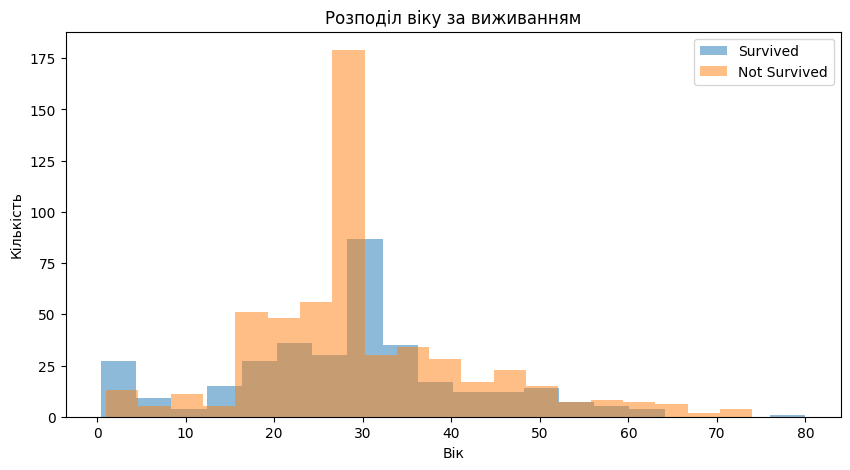

20. Діти виживали частіше, літні – рідше

21. Виживання за групою (стать+клас):
Sex_Class
Female_P1    96.808511
Female_P2    92.105263
Female_P3    50.000000
Male_P1      36.885246
Male_P2      15.740741
Male_P3      13.544669
Name: Survived, dtype: float64
Відповідь: Найвище у жінок першого класу (≈97%), найнижче – у чоловіків третього класу (≈13%)

22. Кореляційна матриця:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.338481 -0.069809  0.257307
Pclass   -0.338481  1.000000 -0.331339 -0.549500
Age      -0.069809 -0.331339  1.000000  0.091566
Fare      0.257307 -0.549500  0.091566  1.000000
Найсильніше корелюють з Survived: Pclass (від'ємна) та Fare (додатна)


In [5]:
# Постельняк Ігор Сергійович ФІТ 3-15
# Варіант 10
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Завдання 2
# Завантажити датасет Титанік з Kaggle (або використовуйте вже завантажений файл titanic.csv)
# Виконати попередній аналіз даних.

print("Завантаження датасету з Kaggle...")
dataset_path = kagglehub.dataset_download("mahmoudshogaa/titanic-dataset")
print("Датасет завантажено в:", dataset_path)

csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("У завантаженому датасеті немає CSV-файлу.")
csv_filename = csv_files[0]
file_path = os.path.join(dataset_path, csv_filename)
print("Використовується файл:", csv_filename)

df_titanic = pd.read_csv(file_path)

print("1. Перші 5 рядків:")
print(df_titanic.head())

print("\n2. Розмір датасету:", df_titanic.shape)

print("\n3. Типи даних:")
print(df_titanic.dtypes)

print("\n4. Пропуски до заповнення:")
print(df_titanic.isnull().sum())

for col in df_titanic.select_dtypes(include=[np.number]).columns:
    df_titanic[col] = df_titanic[col].fillna(df_titanic[col].mean())

print("\n5. Пропуски після заповнення:")
print(df_titanic.isnull().sum())

duplicates = df_titanic.duplicated().sum()
print(f"\n6. Дублікатів: {duplicates}")
if duplicates > 0:
    df_titanic.drop_duplicates(inplace=True)

print("\n7. Описова статистика:")
print(df_titanic.describe())

if 'Cabin' in df_titanic.columns:
    df_titanic.drop('Cabin', axis=1, inplace=True)
    print("\n8. Стовпець Cabin видалено")

selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df_titanic_selected = df_titanic[selected_columns].copy()
print("\n9. Сформовано датасет з обраними стовпцями")

print("Унікальні значення в стовпці Sex:", df_titanic_selected['Sex'].unique())
df_titanic_selected['Sex'] = df_titanic_selected['Sex'].map({'male': 0, 'female': 1})
print("10. Стать замінено на 0/1")

print("\n11. Пропуски у вибраних даних (мають бути 0):")
print(df_titanic_selected.isnull().sum())

print("\n12. Перші 5 рядків після обробки:")
print(df_titanic_selected.head())

print("\n13. Останні 5 рядків:")
print(df_titanic_selected.tail())

# 14. Виживання за статтю
survival_by_sex = df_titanic_selected.groupby('Sex')['Survived'].mean() * 100
print("\n14. Виживання за статтю (%):")
print(survival_by_sex)
print("Відповідь: Жінки мали значно вищий рівень виживання (≈74%) порівняно з чоловіками (≈19%)")

# 15. Виживання за класом
survival_by_class = df_titanic_selected.groupby('Pclass')['Survived'].mean() * 100
print("\n15. Виживання за класом (%):")
print(survival_by_class)
print("Відповідь: Найвищий рівень виживання у першому класі (≈63%), найнижчий – у третьому (≈24%)")

# 16. Середній вік за виживанням
mean_age_survived = df_titanic_selected[df_titanic_selected['Survived']==1]['Age'].mean()
mean_age_not_survived = df_titanic_selected[df_titanic_selected['Survived']==0]['Age'].mean()
print(f"\n16. Середній вік тих, хто вижив: {mean_age_survived:.2f}")
print(f"Середній вік тих, хто не вижив: {mean_age_not_survived:.2f}")
print("Відповідь: Різниця невелика, але діти мали перевагу")

# 17. Групи за тарифами (квартилі)
df_titanic_selected['Fare_group'] = pd.qcut(df_titanic_selected['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
survival_by_fare = df_titanic_selected.groupby('Fare_group', observed=True)['Survived'].mean() * 100
print("\n17. Виживання за групами тарифів (%):")
print(survival_by_fare)
print("Відповідь: Чим вищий тариф, тим більше шансів вижити")

# 18. Середній тариф за класом
mean_fare_by_class = df_titanic_selected.groupby('Pclass')['Fare'].mean()
print("\n18. Середній тариф за класом:")
print(mean_fare_by_class)
print("Відповідь: Різниця суттєва, перший клас має значно вищі тарифи")

# 19. Середній вік за класом
mean_age_by_class = df_titanic_selected.groupby('Pclass')['Age'].mean()
print("\n19. Середній вік за класом:")
print(mean_age_by_class)
print("Відповідь: У першому класі пасажири старші")

# 20. Гістограма віку за виживанням
plt.figure(figsize=(10,5))
plt.hist(df_titanic_selected[df_titanic_selected['Survived']==1]['Age'].dropna(), bins=20, alpha=0.5, label='Survived')
plt.hist(df_titanic_selected[df_titanic_selected['Survived']==0]['Age'].dropna(), bins=20, alpha=0.5, label='Not Survived')
plt.legend()
plt.title('Розподіл віку за виживанням')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.show()
print("20. Діти виживали частіше, літні – рідше")

# 21. Комбінована група стать+клас
df_titanic_selected['Sex_Class'] = df_titanic_selected['Sex'].map({0:'Male',1:'Female'}) + '_P' + df_titanic_selected['Pclass'].astype(str)
survival_by_sex_class = df_titanic_selected.groupby('Sex_Class', observed=True)['Survived'].mean() * 100
print("\n21. Виживання за групою (стать+клас):")
print(survival_by_sex_class.sort_values(ascending=False))
print("Відповідь: Найвище у жінок першого класу (≈97%), найнижче – у чоловіків третього класу (≈13%)")

# 22. Кореляція
corr_titanic = df_titanic_selected[['Survived', 'Pclass', 'Age', 'Fare']].corr()
print("\n22. Кореляційна матриця:")
print(corr_titanic)
print("Найсильніше корелюють з Survived: Pclass (від'ємна) та Fare (додатна)")

# Висновок
# Під час аналізу даних Титаніка підтвердилися відомі факти: жінки, діти та пасажири
# першого класу мали значно вищі шанси на виживання. Стать виявилася найвпливовішим
# фактором, потім – клас і тариф. Вік має менший вплив, але діти до 10 років
# виживали частіше. Кореляційний аналіз показав, що клас і тариф найбільше корелюють
# з виживанням. Отримані результати можуть бути використані для побудови моделей
# прогнозування виживання.